In [2]:
import pandas as pd 
from helper_util import *
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
df=pd.read_csv("/home/jianj0c/project/STP/notebook_SST/files/2023-06-01_to_'2023-06-06.csv")

In [ ]:
#data_df_bar=expand_data_df(data_df)


df_here=df[["relative_humidity","o3","nh3","h2s","so2","no2","co","co2","temperature","particulate_matter_10","particulate_matter_2_5","pressure","particulate_matter_0_1"]]



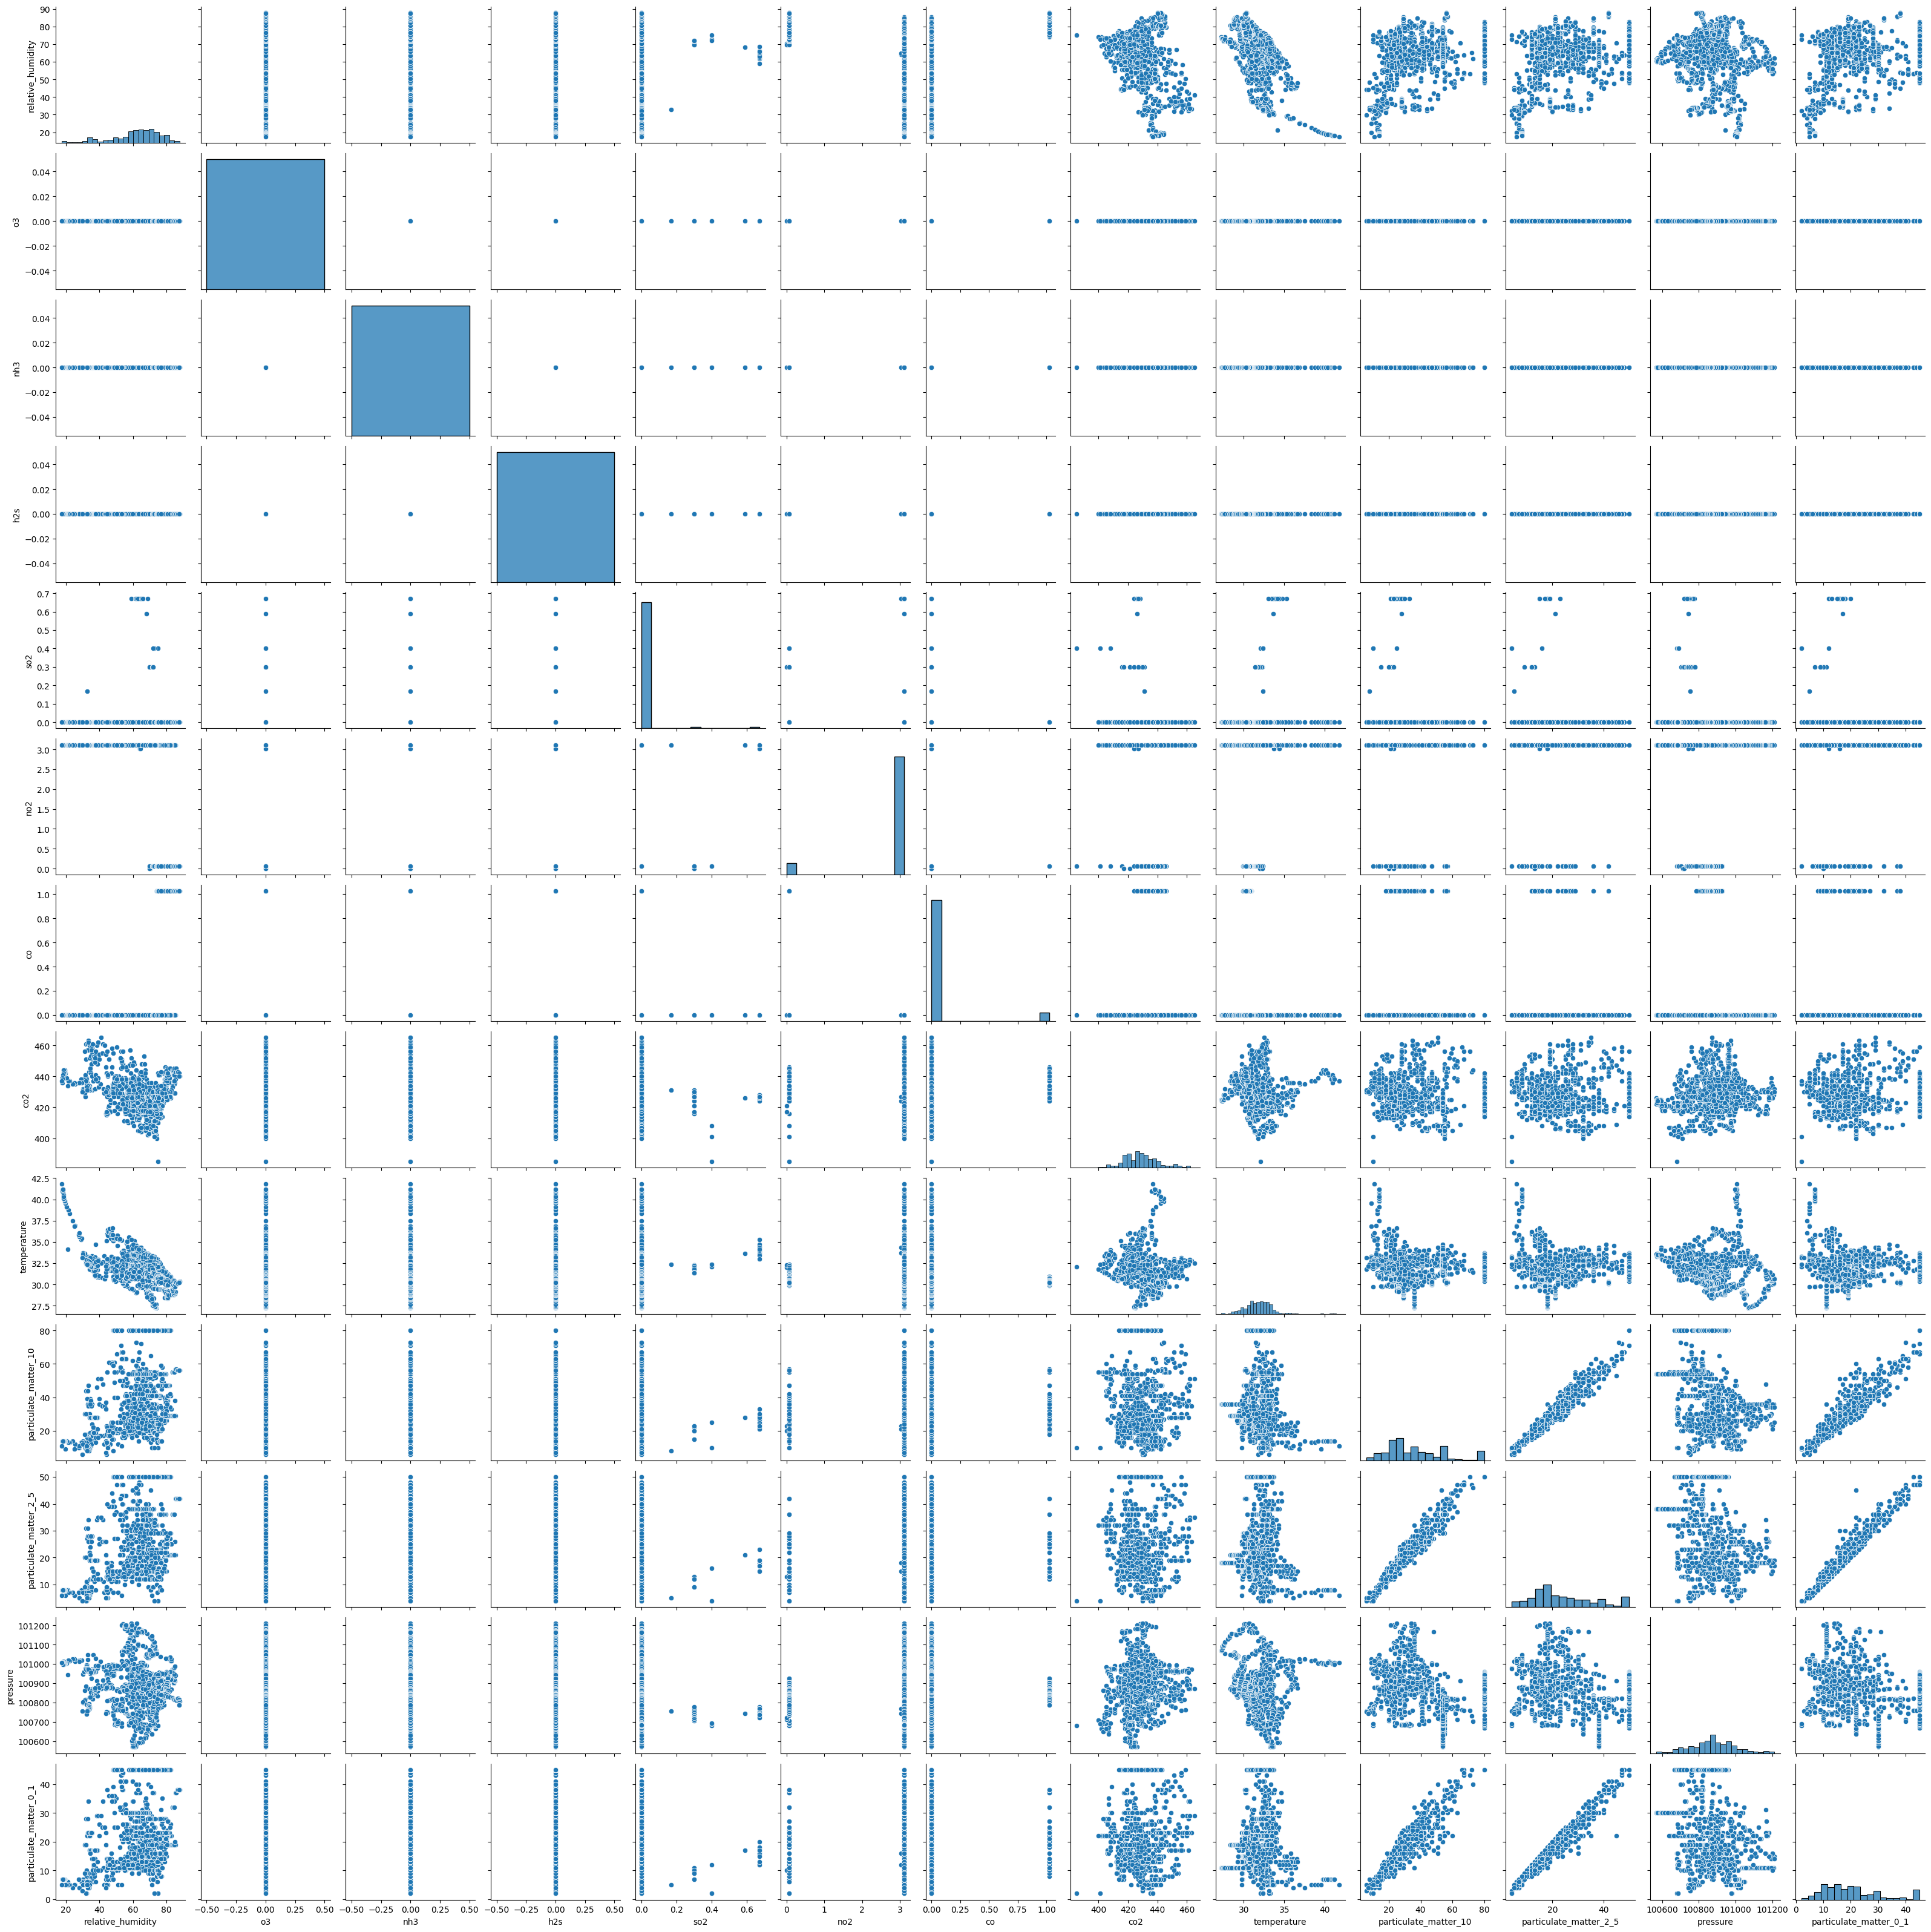

In [6]:
g=sns.pairplot(df_here,corner=False)

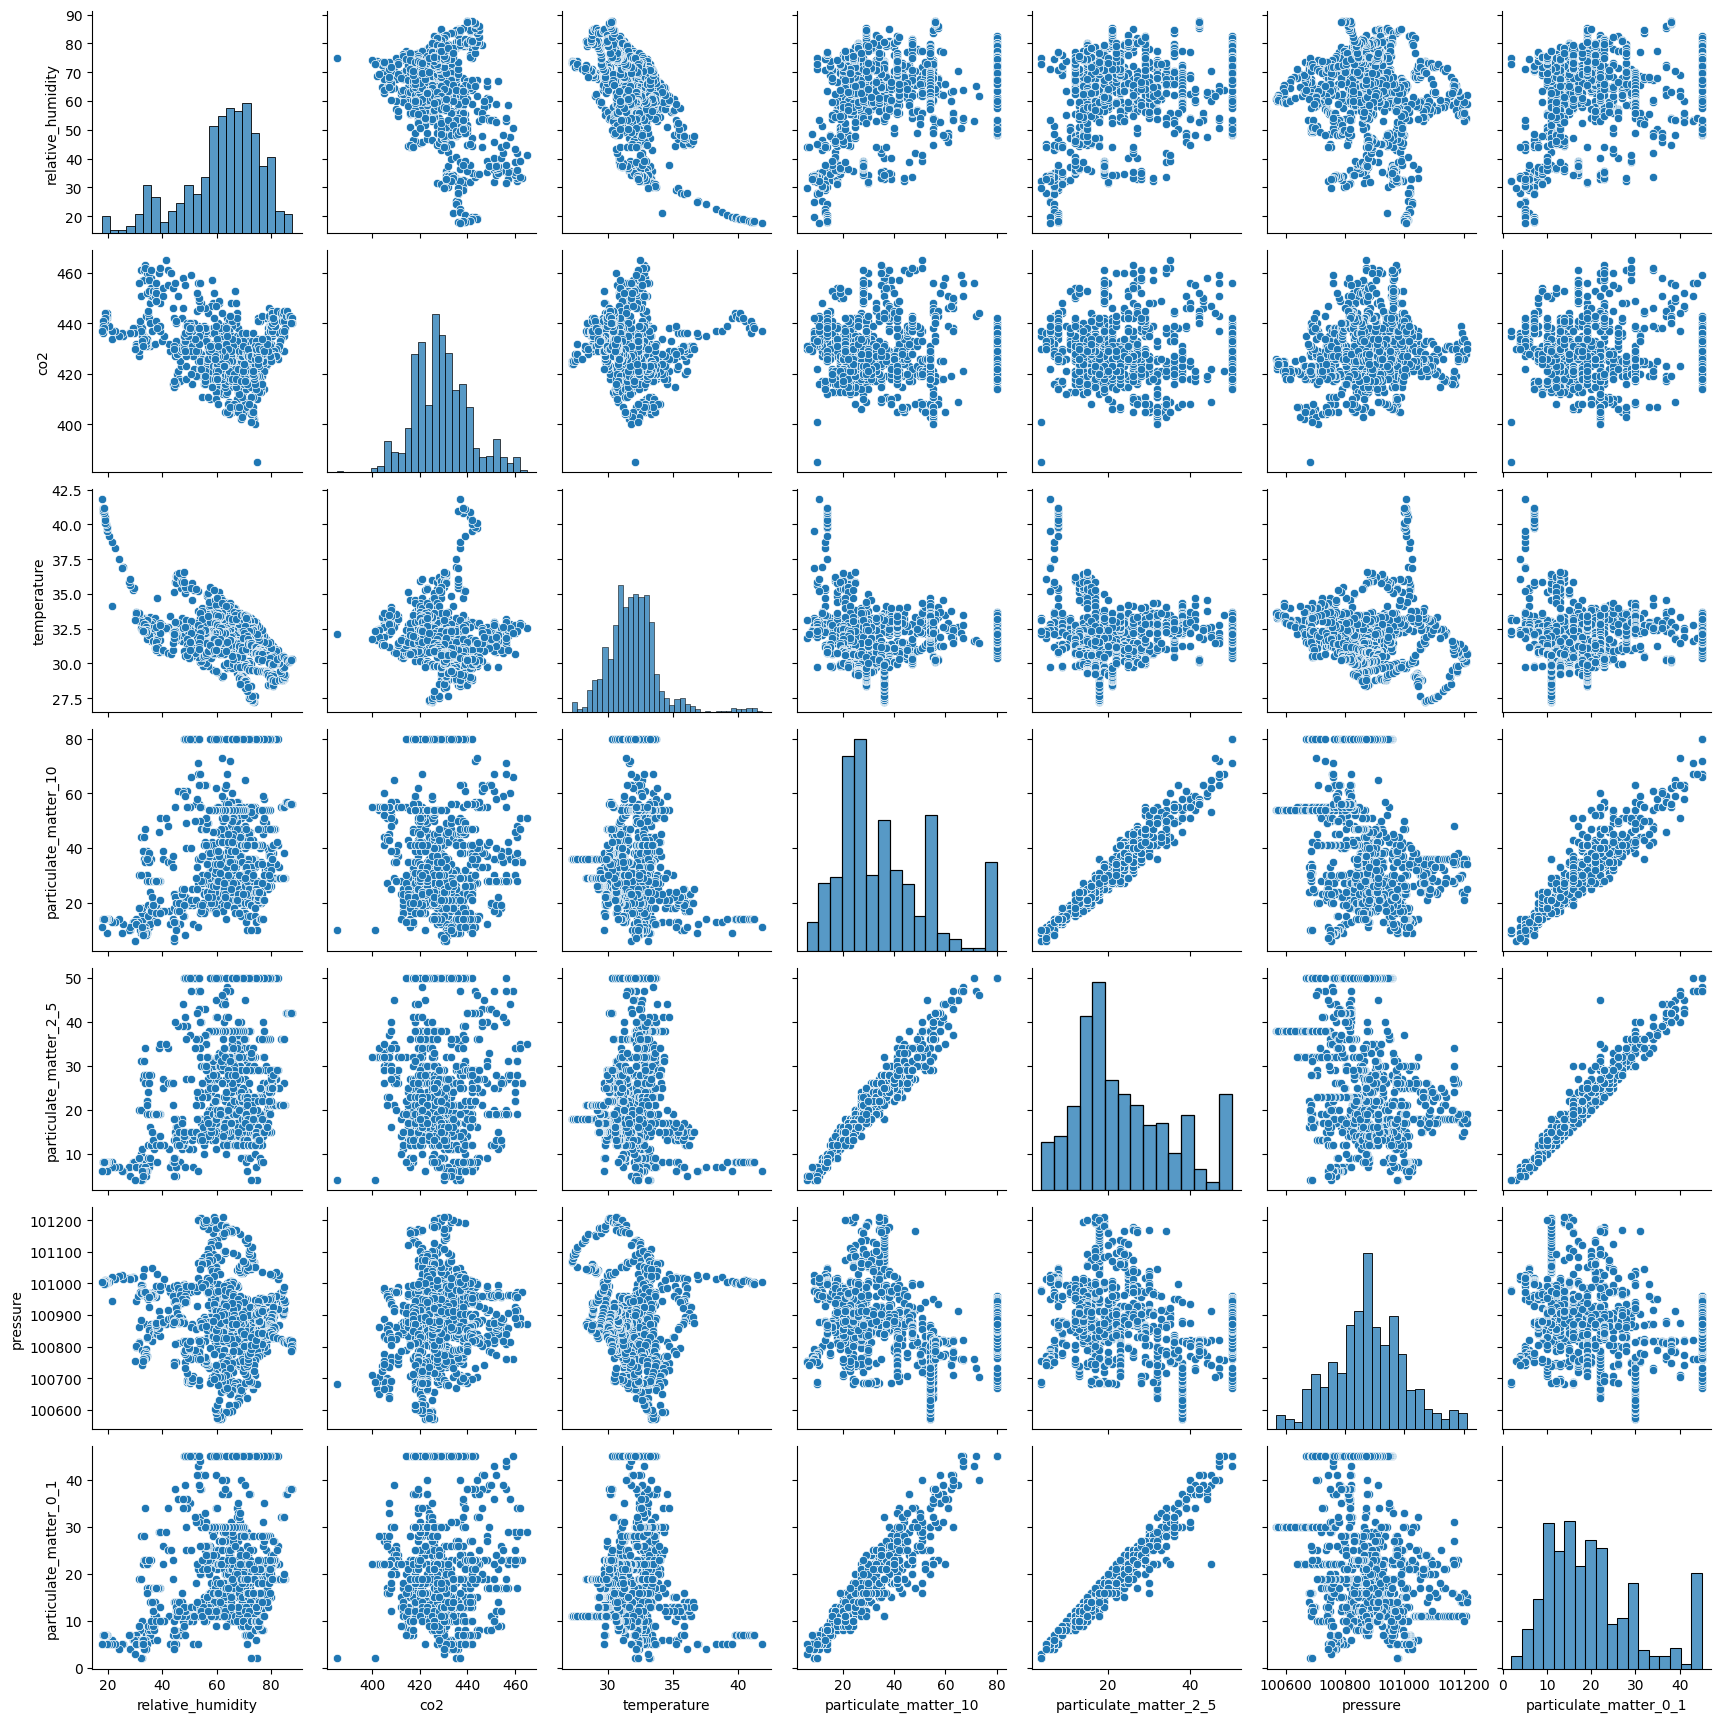

In [ ]:
#data_df_bar=expand_data_df(data_df)

pc_alpha=0.01
quantile=5
df_here=df[["relative_humidity","co2","temperature","particulate_matter_10","particulate_matter_2_5","pressure","particulate_matter_0_1"]]
g=sns.pairplot(df_here,corner=False)



Only "relative_humidity", "co2", "temperature", "particulate_matter_10", "particulate_matter_2_5", "pressure", "particulate_matter_0_1" are continuous features. 



Upper tail causality

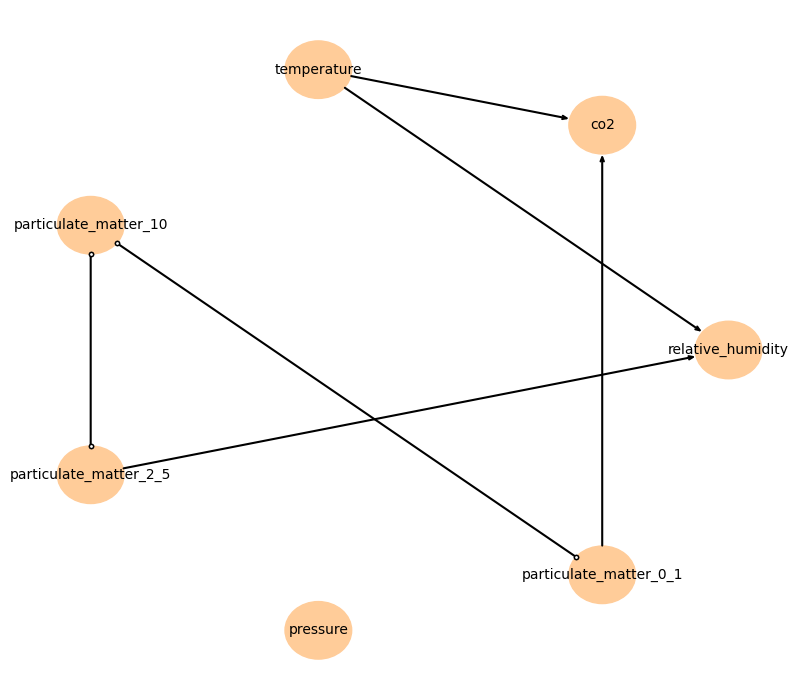

In [53]:
pc_alpha=0.01
quantile=5
df_here= df[["relative_humidity","co2","temperature","particulate_matter_10","particulate_matter_2_5","pressure","particulate_matter_0_1"]]
resultsThisPaper,_=method_this_paper(df_here,both_tail=False,pc_alpha=pc_alpha,quantile=quantile)
draw_graph(edge_shape=resultsThisPaper,arrow_linewidth=3,arrowhead_size=5,label_fontsize=10,node_size=0.2,figsize=(10,10),var_names=df_here.columns)

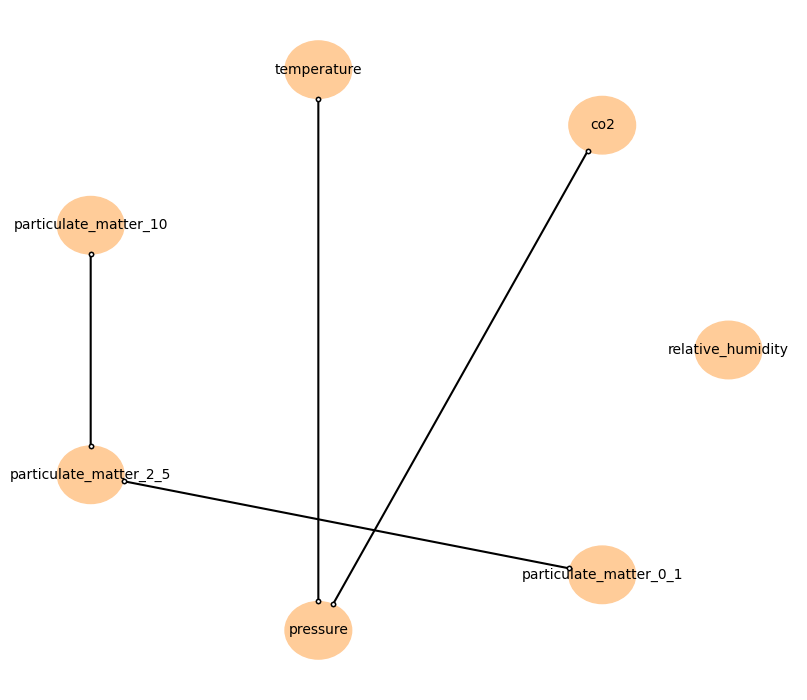

In [46]:
pc_alpha=0.01
quantile=5
df_here= df[["relative_humidity","co2","temperature","particulate_matter_10","particulate_matter_2_5","pressure","particulate_matter_0_1"]]
resultsThisPaper,_=method_this_paper(-df_here,both_tail=False,pc_alpha=pc_alpha,quantile=quantile)
draw_graph(edge_shape=resultsThisPaper,arrow_linewidth=3,arrowhead_size=5,label_fontsize=10,node_size=0.2,figsize=(10,10),var_names=df_here.columns)

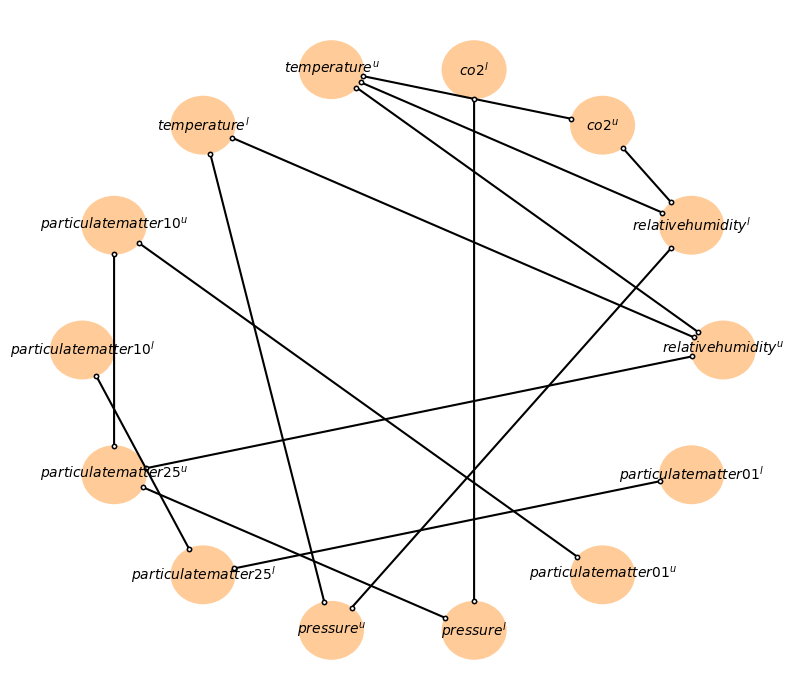

In [ ]:
def expand_data_df(data_df):

    X_bar = np.concatenate([data_df, -data_df], axis=1)
    data_df_bar=pd.DataFrame(X_bar,columns=[f"{x.replace('_','')}.u" for x in data_df.columns]+[f"{x.replace('_','')}.l" for x in data_df.columns])
    return data_df_bar
df_here= df[["relative_humidity","co2","temperature","particulate_matter_10","particulate_matter_2_5","pressure","particulate_matter_0_1"]]

data_df_bar=expand_data_df(df_here)
resultsThisPaper,_=method_this_paper(data_df_bar,both_tail=True,pc_alpha=pc_alpha,quantile=5)

var_names=np.array([f"${x.replace('_','')}^{{u}}$" for x in df_here.columns]+[f"${x.replace('_','')}^{{l}}$" for x in df_here.columns])
draw_graph(arrow_linewidth=3,arrowhead_size=5,label_fontsize=10,node_size=0.2,figsize=(10,10),**sort_name_and_edge(resultsThisPaper,var_names))

Lower tail causality

linear causal

In [47]:
from tigramite.independence_tests import ParCorr

dataframeRvier=pp.DataFrame(df_here.ffill().values,var_names=df_here.columns)
pcmci_parcorr = PCMCI(
    dataframe=dataframeRvier, 
    cond_ind_test=ParCorr())
results_linear = pcmci_parcorr.run_pcmciplus(tau_max=1, tau_min=0,pc_alpha=pc_alpha,contemp_collider_rule="conservative")

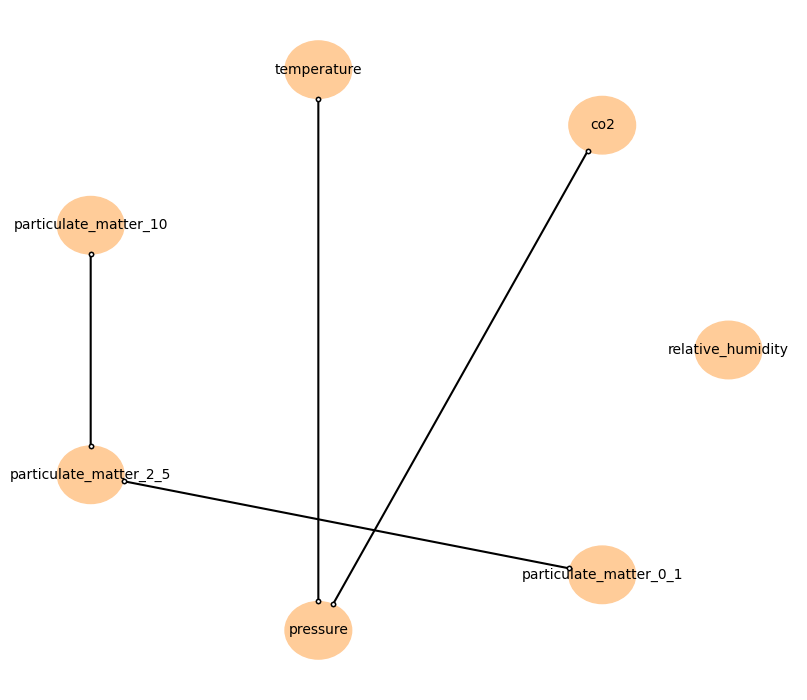

In [48]:
draw_graph(edge_shape=resultsThisPaper,arrow_linewidth=3,arrowhead_size=5,label_fontsize=10,node_size=0.2,figsize=(10,10),var_names=df_here.columns)